In [173]:
##Dataset source: 
##https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f

# Dependencies and Setup
%matplotlib widget
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time

##for DF merge
from functools import reduce
import re

## This allows the display of more than one variable in a cell
## without having to explicitly invoke the display command:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [174]:
# Load the CSV file into a Pandas DataFrame and apply any filters
data_df = pd.read_csv("Resources/DrugODs_Demographic.csv")

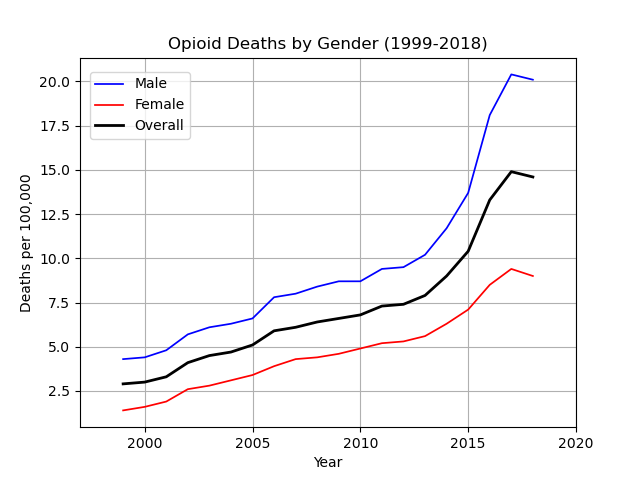

In [175]:
##Filter core data to be analyzed (i.e. only opioid deaths, deaths per 100k - age-adjusted)
all_df = data_df[data_df["PANEL"] == "Drug overdose deaths involving any opioid"]
all_df = all_df[all_df["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]

male_df = all_df[all_df["STUB_LABEL"] == "Male"]
female_df = all_df[all_df["STUB_LABEL"] == "Female"]
all_df = all_df[all_df["STUB_LABEL"] == "All persons"]

# Generate a line plot of Deaths per 100k vs. calendar year
##Define data to be analyzed from DF (One set each for all, male, female)
Year_all = all_df.loc[:,"YEAR"]

Deaths_all = all_df.loc[:,"ESTIMATE"]
Deaths_male = male_df.loc[:,"ESTIMATE"]
Deaths_female = female_df.loc[:,"ESTIMATE"]

##Set parameters and variables to be plotted on a line chart with output
fig, ax1 = plt.subplots()
plt.title("Opioid Deaths by Gender (1999-2018)", fontsize=12)
ax1.set_xlim(min(Year_all)-2, max(Year_all)+2)
ax1.set_ylabel("Deaths per 100,000")
ax1.set_xlabel("Year")
plt.grid(True)

#set line plots
all,    = plt.plot(Year_all, Deaths_all, linewidth=2.0, marker="", color="black", label="Overall")
male,   = plt.plot(Year_all, Deaths_male, linewidth=1.25, marker="", color="blue", label="Male")
female, = plt.plot(Year_all, Deaths_female, linewidth=1.25, marker="", color="red", label="Female")

#set legend, save to file and output to screen
plt.legend(handles=[male,
                    female,
                    all], loc=(0.02,.78))
plt.savefig("output/rate_by_gender.png")
plt.show();

In [176]:
#Summarize Opiod Deaths chart above
gender_df = data_df.copy()

#Set parameters to be included
gender_df = gender_df[gender_df["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]
gender_df = gender_df[gender_df["PANEL"] == "Drug overdose deaths involving any opioid"]
gender_df = gender_df[gender_df["STUB_NAME"].isin(["Total","Sex"])]
gender_df = gender_df[gender_df["YEAR"].isin([1999,2004,2009,2014,2018])]

#Finalize DF
gender_df["YEAR"]= gender_df["YEAR"].astype(str)
gender_df = pd.DataFrame(gender_df[["YEAR","STUB_LABEL","ESTIMATE"]])
gender_df = gender_df.rename(columns = {"YEAR":"Year",
                                        "STUB_LABEL":"Gender",
                                        "ESTIMATE":"Deaths per 100k"})

#Call values for 2018 death rates for ratio calculation
male_2018 = gender_df[gender_df["Year"] == "2018"]
male_2018 = male_2018[male_2018["Gender"] == "Male"]
male_2018 = male_2018.values[0,2]

female_2018 = gender_df[gender_df["Year"] == "2018"]
female_2018 = female_2018[female_2018["Gender"] == "Female"].round(2)
female_2018 = female_2018.values[0,2]

#Calculate ratio of men to women overdose death rates
calc_2018 = round(male_2018 / female_2018, 2)

#formating summary DF for presentation
gender_df = gender_df.groupby(["Year","Gender"])["Deaths per 100k"].sum()
gender_df = pd.DataFrame(gender_df)
gender_df = gender_df.transpose()

#Output to ratio & DF to screen
print(f"By 2018, the ratio of men to women overdosing from opioids was {calc_2018}.")
gender_df

By 2018, the ratio of men to women overdosing from opioids was 2.23.


Year                   1999                    2004                    2009  \
Gender          All persons Female Male All persons Female Male All persons   
Deaths per 100k         2.9    1.4  4.3         4.7    3.1  6.3         6.6   

Year                               2014                     2018               
Gender          Female Male All persons Female  Male All persons Female  Male  
Deaths per 100k    4.6  8.7         9.0    6.3  11.7        14.6    9.0  20.1

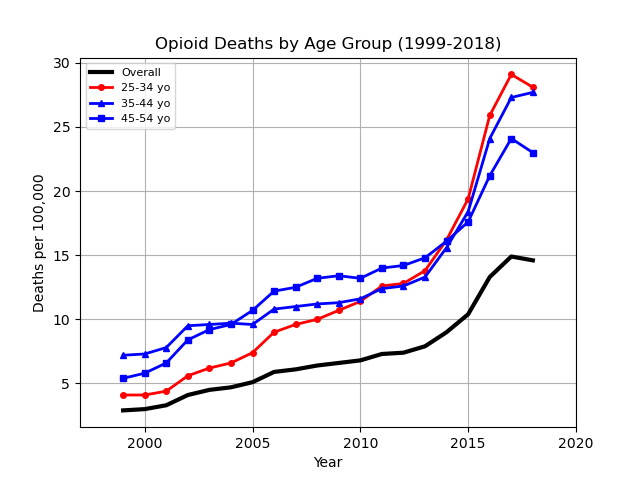

In [177]:
##Deaths by age grouping
##Filter core data to be analyzed (i.e. only opioid deaths, deaths per 100k - age-adjusted)
age_df = data_df[data_df["PANEL"] == "Drug overdose deaths involving any opioid"]
age_df = age_df[age_df["STUB_NAME"] == "Age"]

##Separate each age group into separate DFs
under_15_df     = age_df[age_df["STUB_LABEL"] == "Under 15 years"]
age_15_24_df    = age_df[age_df["STUB_LABEL"] == "15-24 years"]
age_25_34_df    = age_df[age_df["STUB_LABEL"] == "25-34 years"]
age_35_44_df    = age_df[age_df["STUB_LABEL"] == "35-44 years"]
age_45_54_df    = age_df[age_df["STUB_LABEL"] == "45-54 years"]
age_55_64_df    = age_df[age_df["STUB_LABEL"] == "55-64 years"]
age_65_74_df    = age_df[age_df["STUB_LABEL"] == "65-74 years"]
age_75_84_df    = age_df[age_df["STUB_LABEL"] == "75-84 years"]
inc_n_ovr_85_df = age_df[age_df["STUB_LABEL"] == "85 years and over"]

# Generate a line plot of Deaths per 100k vs. calendar year
##Define data to be analyzed from DF (One set each for all, each age group)
Year_all = all_df.loc[:,"YEAR"]

Deaths_all      =          all_df.loc[:,"ESTIMATE"]
Deaths_und15    =     under_15_df.loc[:,"ESTIMATE"]
Deaths_15_24    =    age_15_24_df.loc[:,"ESTIMATE"]
Deaths_25_34    =    age_25_34_df.loc[:,"ESTIMATE"]
Deaths_35_44    =    age_35_44_df.loc[:,"ESTIMATE"]
Deaths_45_54    =    age_45_54_df.loc[:,"ESTIMATE"]
Deaths_55_64    =    age_55_64_df.loc[:,"ESTIMATE"]
Deaths_65_74    =    age_65_74_df.loc[:,"ESTIMATE"]
Deaths_75_84    =    age_75_84_df.loc[:,"ESTIMATE"]
Deaths_85_n_ovr = inc_n_ovr_85_df.loc[:,"ESTIMATE"]

##Set parameters and variables to be plotted on a line chart with output
fig, ax1 = plt.subplots()
plt.title("Opioid Deaths by Age Group (1999-2018)", fontsize=12)
ax1.set_xlim(min(Year_all)-2, max(Year_all)+2)

ax1.set_ylabel("Deaths per 100,000")
ax1.set_xlabel("Year")
plt.grid(True)

##Set up of line plots
##Commented out certain lines below in order to focus plot output on more heavily afflicted age groups.

all,      = plt.plot(Year_all, Deaths_all, linewidth=3.0, marker="", color="black", label="Overall")
##age_un15,  = plt.plot(Year_all, Deaths_und15, linewidth=0.50, marker="", label="Under 15")
##age_15_24, = plt.plot(Year_all, Deaths_15_24, linewidth=0.50, marker="", label="15-24")
age_25_34, = plt.plot(Year_all, Deaths_25_34, linewidth=2.00, marker="o", markersize=4, color="red", label="25-34 yo")
age_35_44, = plt.plot(Year_all, Deaths_35_44, linewidth=2.00, marker="^", markersize=4, color="blue", label="35-44 yo")
age_45_54, = plt.plot(Year_all, Deaths_45_54, linewidth=2.00, marker="s", markersize=4, color="blue", label="45-54 yo")
##age_55_64, = plt.plot(Year_all, Deaths_55_64, linewidth=1.25, marker="", label="55-64")
##age_65_74, = plt.plot(Year_all, Deaths_65_74, linewidth=0.50, marker="", label="65-74")
##age_75_84, = plt.plot(Year_all, Deaths_75_84, linewidth=0.50, marker="", label="75-84")
##age_85ovr, = plt.plot(Year_all, Deaths_85_n_ovr, linewidth=0.50, marker="", label="85 & Over")

plt.legend(handles=[all,
##                    age_un15,
##                    age_15_24,
                    age_25_34,
                    age_35_44,
                    age_45_54
##                    age_55_64,
##                    age_65_74,
##                    age_75_84,
##                    age_85ovr
                   ], loc="best", fontsize=8)
plt.savefig("output/rate_by_age.png")
plt.show();

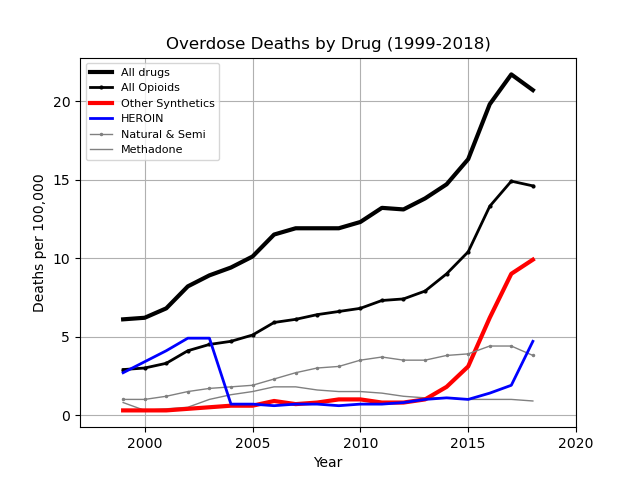

In [178]:
##Deaths by methadone, other synthetics, all opioids
#Filter core data to be analyzed (i.e. only synthetic opioid deaths, deaths per 100k - age-adjusted)
# synth_df = data_df[data_df["PANEL"].isin(["Drug overdose deaths involving any opioid",
#                                           "Drug overdose deaths involving methadone",
#                                           "Drug overdose deaths involving other synthetic opioids (other than methadone)"])]

synth_df = data_df

synth_df = synth_df[synth_df["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]
synth_df = synth_df[synth_df["STUB_NAME"] == "Total"]

##Generate a line plot of Deaths per 100k vs. calendar year
##Define data to be analyzed from DF (One set each for all, each drug grouping)

# for x-axis setting
all_year= synth_df.loc[synth_df["PANEL"] == "Drug overdose deaths involving any opioid"]["YEAR"]

# data for line plots
Deaths_all_op  = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving any opioid"]\
                                   ["ESTIMATE"]
Deaths_meth    = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving methadone"]\
                                   ["ESTIMATE"]
Deaths_synth   = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving other synthetic opioids (other than methadone)"]\
                                   ["ESTIMATE"]

Deaths_ALL     = synth_df[synth_df["PANEL"] == "All drug overdose deaths"]\
                                   ["ESTIMATE"]
Deaths_natsemi = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving natural and semisynthetic opioids"]\
                                   ["ESTIMATE"]
Deaths_heroin  = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving heroin"]\
                                   ["ESTIMATE"]


##Set parameters and variables to be plotted on a line chart with output
fig, ax1 = plt.subplots()
plt.title("Overdose Deaths by Drug (1999-2018)", fontsize=12)
ax1.set_xlim(min(Year_all)-2, max(Year_all)+2)
ax1.set_ylabel("Deaths per 100,000")
ax1.set_xlabel("Year")
plt.grid(True)

# line plots
all_op,    = plt.plot(all_year, Deaths_all_op, linewidth=2.0, marker="o", markersize=2, color="black", label="All Opioids")
methodone, = plt.plot(all_year, Deaths_meth, linewidth=1.0, marker="", color="gray", label="Methadone")
oth_syn,   = plt.plot(all_year, Deaths_synth, linewidth=3.0, marker="", color="red", label="Other Synthetics")

ALL_drugs, = plt.plot(all_year, Deaths_ALL, linewidth=3.0, marker="", color="black", label="All drugs")
nat_semi,  = plt.plot(all_year, Deaths_natsemi, linewidth=1.0, marker="o", markersize=1.5, color="gray", label="Natural & Semi")
heroin,    = plt.plot(all_year, Deaths_heroin, linewidth=2.0, marker="", color="blue", label="HEROIN")

# legend
plt.legend(handles=[ALL_drugs,
                    all_op,
                    oth_syn,
                    heroin,
                    nat_semi,
                    methodone
                   ], loc="best", fontsize=8)

# save to file and output to screen
plt.savefig("output/rate_by_synth.png")
plt.show();

In [179]:
###Build out of population by state DF
#Pull of data from multiple csv files
nineties_pop_df = pd.read_csv("Resources/USPopByState1990-1999.csv")
aughts_pop_df   = pd.read_csv("Resources/USPopByState2000-2009(mod).csv",
                              usecols=[3,9,10,11,12,13,14,15,16,17,18,19],
                              names=  ["State",
                                       "2000",
                                       "2001",
                                       "2002",
                                       "2003",
                                       "2004",
                                       "2005",
                                       "2006",
                                       "2007",
                                       "2008",
                                       "2009",
                                       "2010"])
                                                                                  
tens_pop_df     = pd.read_csv("Resources/USPopByState2010-2020.csv",
                              usecols=[4,7,8,9,10,11,12,13,14,15],
                              names=  ["State",
                                       "2011",
                                       "2012",
                                       "2013",
                                       "2014",
                                       "2015",
                                       "2016",
                                       "2017",
                                       "2018",
                                       "2019"])

twenties_pop_df = pd.read_csv("Resources/USPopByState2020-2023.csv",
                              usecols=[4,6,7,8,9],
                              names=  ["State",
                                       "2020",
                                       "2021",
                                       "2022",
                                       "2023"])

#Clean up of DFs to facilitate merge
aughts_pop_df=aughts_pop_df.drop(0)

tens_pop_df=tens_pop_df.drop(0)

twenties_pop_df=twenties_pop_df.drop(0)

# Combine the data into a single DataFrame
all_pop_dfs = [nineties_pop_df,
               aughts_pop_df,
               tens_pop_df,
               twenties_pop_df]

pop_by_state_df = reduce(lambda  left,right: pd.merge(left,right,on=["State"],
                                                            how="inner"), all_pop_dfs)

pop_by_state_df.replace(",","", regex=True, inplace=True)
pop_cols = pop_by_state_df.iloc[:,2:35].select_dtypes(object).columns
pop_by_state_df[pop_cols] = pop_by_state_df[pop_cols].apply(pd.to_numeric,errors='coerce')

# Display the data table for preview
pop_by_state_df.head()

# Output to csv
pop_by_state_df.to_csv("output/pop_by_state_df.csv")

,State,ST,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alabama,AL,4048508,4091025,4139269,4193114,4232965,4262731,4290403,4320281,...,4831586,4843737,4854803,4866824,4877989,4891628,5031864,5050380,5073903,5108468
1,Alaska,AK,553120,569273,587073,596993,600624,601345,604918,608846,...,737626,737075,738430,742575,740983,736624,732964,734923,733276,733406
2,Arizona,AZ,3679056,3762394,3867333,3993390,4147561,4306908,4432308,4552207,...,6634690,6732873,6832810,6944767,7048088,7164228,7186683,7272487,7365684,7431344
3,Arkansas,AR,2354343,2370666,2394098,2423743,2450605,2480121,2504858,2524007,...,2960459,2968759,2979732,2991815,3003855,3012161,3014348,3028443,3046404,3067732
4,California,CA,29950111,30414114,30875920,31147208,31317179,31493525,31780829,32217708,...,38253768,38586706,38904296,39149186,39337785,39437463,39503200,39145060,39040616,38965193


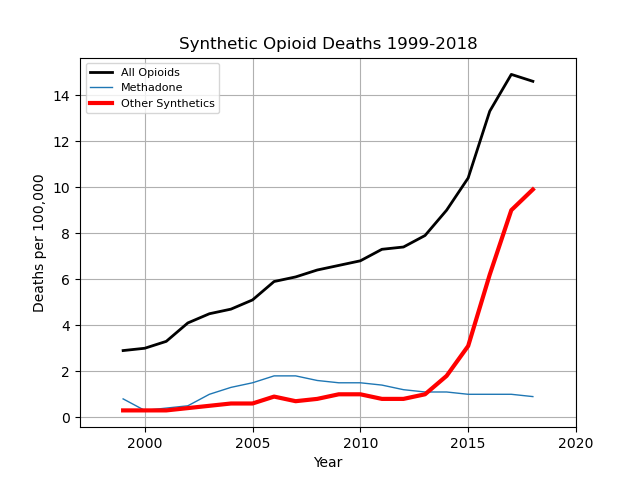

In [180]:
##Deaths by methadone, other synthetics, all opioids
#Filter core data to be analyzed (i.e. only synthetic opioid deaths, deaths per 100k - age-adjusted)
synth_df = data_df[data_df["PANEL"].isin(["Drug overdose deaths involving any opioid",
                                          "Drug overdose deaths involving methadone",
                                          "Drug overdose deaths involving other synthetic opioids (other than methadone)"])]
synth_df = synth_df[synth_df["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]
synth_df = synth_df[synth_df["STUB_NAME"] == "Total"]

##Generate a line plot of Deaths per 100k vs. calendar year
##Define data to be analyzed from DF (One set each for all, each drug grouping)

# for x-axis setting
all_year= synth_df.loc[synth_df["PANEL"] == "Drug overdose deaths involving any opioid"]["YEAR"]

# data for line plots
Deaths_all   = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving any opioid"]\
                                    ["ESTIMATE"]
Deaths_meth  = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving methadone"]\
                                    ["ESTIMATE"]
Deaths_synth = synth_df[synth_df["PANEL"] == "Drug overdose deaths involving other synthetic opioids (other than methadone)"]\
                                    ["ESTIMATE"]

##Set parameters and variables to be plotted on a line chart with output
fig, ax1 = plt.subplots()
plt.title("Synthetic Opioid Deaths 1999-2018", fontsize=12)
ax1.set_xlim(min(Year_all)-2, max(Year_all)+2)
ax1.set_ylabel("Deaths per 100,000")
ax1.set_xlabel("Year")
plt.grid(True)

##Grouped bar charts
# groups = [[23,135,3], [123,500,1]]
# group_labels = ['views', 'orders']

# # Convert data to pandas DataFrame.
# df = pd.DataFrame(groups, index=group_labels).T

# # Plot.
# pd.concat(
#     [
#         df.mean().rename('average'), 
#         df.min().rename('min'), 
#         df.max().rename('max')
#     ],
#     axis=1,
# ).plot.bar()


# line plots
all_od,  = plt.plot(all_year, Deaths_all, linewidth=2.0, marker="", color="black", label="All Opioids")
meth_od, = plt.plot(all_year, Deaths_meth, linewidth=1.0, marker="", label="Methadone")
oth_syn, = plt.plot(all_year, Deaths_synth, linewidth=3.0, marker="", color="red", label="Other Synthetics")

# legend
plt.legend(handles=[all_od,
                    meth_od,
                    oth_syn
                   ], loc="best", fontsize=8)

# save to file and output to screen
plt.savefig("output/rate_by_synth.png")
plt.show();